# Assignment 3 - 1B (MLFFNN)

Team members:
- N Sowmya Manojna (BE17B007)
- Thakkar Riya Anandbhai (PH17B010)
- Chaithanya Krishna Moorthy (PH17B011)

## Import Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 18
plt.rcParams["axes.grid"] = True
plt.rcParams['font.serif'] = "Cambria"
plt.rcParams['font.family'] = "serif"

get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')

import warnings
warnings.filterwarnings("ignore")

from gridsearch import GridSearch1B

## Read the data, Split it

In [2]:
# Get the data
column_names = ["x1", "x2", "y"]
df = pd.read_csv("../datasets/1B/train.csv", names=column_names)
df_test = pd.read_csv("../datasets/1B/dev.csv", names=column_names)
display(df.head())

# Split dev into test and validation
df_val, df_test = train_test_split(df_test, test_size=0.3, random_state=42)
display(df_val.head())
display(df_test.head())

x1        x2    y
0  0.537115  0.452538  0.0
1  0.380729  0.371252  0.0
2  0.551707  0.496879  0.0
3  0.128153  0.337706  0.0
4 -0.893600 -2.493547  0.0

x1        x2    y
67 -0.019659 -1.153679  2.0
31  1.436933  1.499611  1.0
75 -2.383817  0.405503  2.0
9   0.749243 -0.226078  0.0
68 -2.163703  1.187660  2.0

x1        x2    y
40 -0.147620 -0.135928  1.0
22  0.015013  0.068611  0.0
55  2.889180 -0.051103  1.0
70 -2.105578  0.785977  2.0
0   0.438052 -2.337230  0.0

In [3]:
X_train = df[["x1", "x2"]].to_numpy()
y_train = df["y"].to_numpy().astype("int")

X_val = df_val[["x1", "x2"]].to_numpy()
y_val = df_val["y"].to_numpy().astype("int")

X_test = df_test[["x1", "x2"]].to_numpy()
y_test = df_test["y"].to_numpy().astype("int")

## Training the Model

In [4]:
parameters = {"hidden_layer_sizes":[(5,5),(6,6),(7,7),(8,8),(9,9),(10,10)],\
              "activation":["logistic", "relu"], \
              "batch_size":[50, 100, 200], "early_stopping":[True, False], \
              "learning_rate":["constant", "adaptive", "invscaling"], \
              "alpha":[0.01, 0.001]
             }

mlp = MLPClassifier(random_state=1)

clf = GridSearch1B(mlp, parameters)
clf.fit(X_train, y_train, X_val, y_val)
result_df = pd.DataFrame(clf.cv_results_)
result_df.to_csv("../parameter_search/1B_MLFFNN_train_val.csv")
result_df.head(10)

100%|██████████| 432/432 [02:26<00:00,  2.94it/s]


hidden_layer_sizes activation  batch_size  early_stopping learning_rate  \
0             (8, 8)       relu          50           False    invscaling   
1             (8, 8)       relu          50           False      adaptive   
2             (8, 8)       relu          50           False    invscaling   
3             (8, 8)       relu          50           False      constant   
4             (8, 8)       relu          50           False      adaptive   
5             (8, 8)       relu          50           False      constant   
6           (10, 10)       relu          50           False      adaptive   
7           (10, 10)       relu          50           False    invscaling   
8           (10, 10)       relu          50           False      constant   
9           (10, 10)       relu          50           False    invscaling   

   alpha   accuracy  val_accuracy  sum_accuracy     t_inv  
0  0.010  99.333333     98.412698    197.746032  1.028157  
1  0.001  99.333333     98.412698    197.746032  1.022898  
2  0.001  99.333333     98.412698    197.746032  1.022785  
3  0.001  99.333333     98.412698    197.746032  1.021499  
4  0.010  99.333333     98.412698    197.746032  1.010340  
5  0.010  99.333333     98.412698    197.746032  1.007514  
6  0.010  99.000000     98.412698    197.412698  0.989185  
7  0.010  99.000000     98.412698    197.412698  0.979272  
8  0.010  99.000000     98.412698    197.412698  0.968840  
9  0.001  99.000000     96.825397    195.825397  1.012148

In [5]:
print("Best Parameters Choosen:")
for i in clf.best_params_:
    print("   - ", i, ": ", clf.best_params_[i], sep="")

best_mlp = MLPClassifier(random_state=1, **clf.best_params_)
best_mlp.fit(X_train, y_train)

Best Parameters Choosen:
   - hidden_layer_sizes: (8, 8)
   - activation: relu
   - batch_size: 50
   - early_stopping: False
   - learning_rate: invscaling
   - alpha: 0.01


MLPClassifier(alpha=0.01, batch_size=50, hidden_layer_sizes=(8, 8),
              learning_rate='invscaling', random_state=1)

## Best Model Predictions

Accuracy: 99.33333333333333


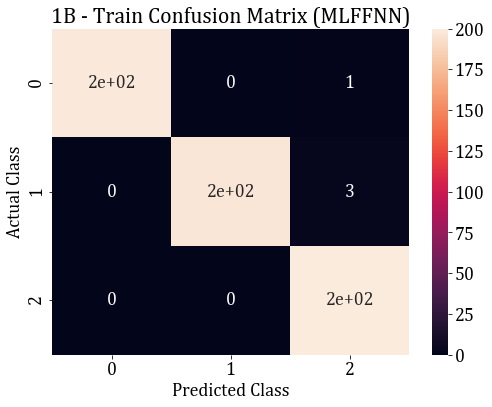

Validation Accuracy: 98.41269841269842


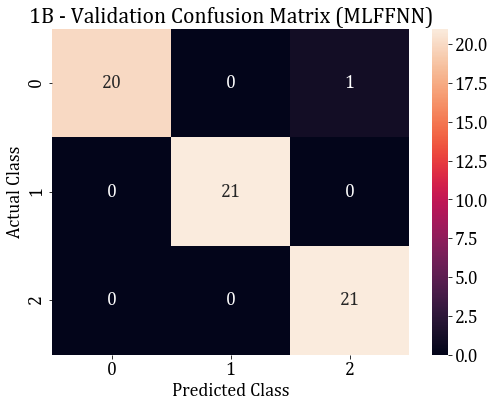

Test Accuracy: 96.29629629629629


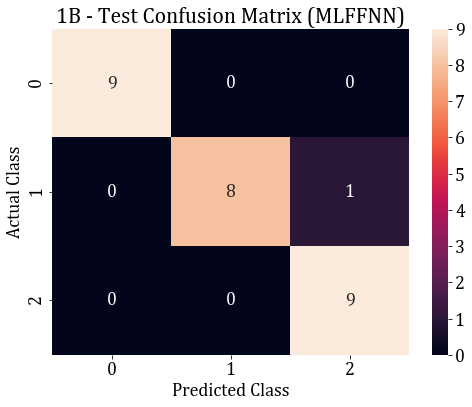

In [6]:
y_pred = best_mlp.predict(X_train)
print("Accuracy:", 100*np.sum(y_pred==y_train)/y_train.size)
conf_mat = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True)
plt.title("1B - Train Confusion Matrix (MLFFNN)")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.savefig("images/1B_MLFFNN_train_confmat.png")
plt.show()

y_val_pred = best_mlp.predict(X_val)
print("Validation Accuracy:", 100*np.sum(y_val_pred==y_val)/y_val.size)
val_conf_mat = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8,6))
sns.heatmap(val_conf_mat, annot=True)
plt.title("1B - Validation Confusion Matrix (MLFFNN)")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.savefig("images/1B_MLFFNN_val_confmat.png")
plt.show()

y_test_pred = best_mlp.predict(X_test)
print("Test Accuracy:", 100*np.sum(y_test_pred==y_test)/y_test.size)
test_conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(test_conf_mat, annot=True)
plt.title("1B - Test Confusion Matrix (MLFFNN)")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.savefig("images/1B_MLFFNN_test_confmat.png")
plt.show()

## Visualising the decision boundaries

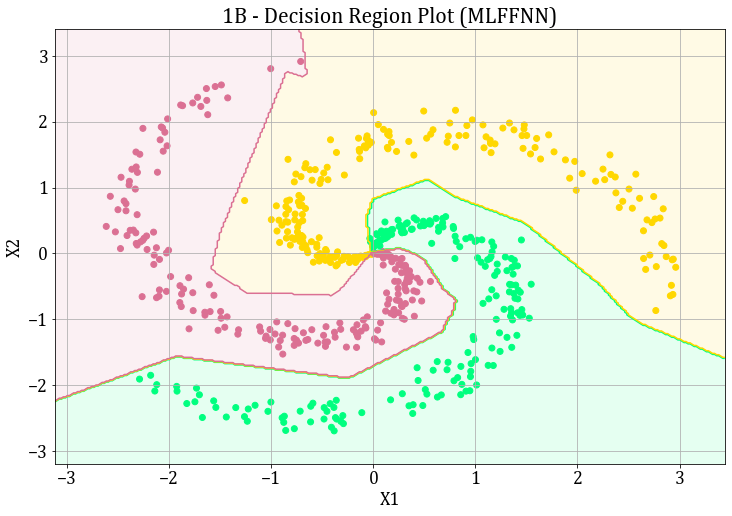

In [7]:
h = 0.02
x_min, x_max = X_train[:,0].min() - .5, X_train[:,0].max() + .5
y_min, y_max = X_train[:,1].min() - .5, X_train[:,1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z_pro = np.argmax(best_mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()]), axis=1)
Z_pro = Z_pro.reshape(xx.shape)

color_list = ["springgreen", "gold", "palevioletred", "royalblue"]
plt.figure(figsize=(12,8))
plt.title("1B - Decision Region Plot (MLFFNN)")
plt.contourf(xx, yy, Z_pro, np.unique(Z_pro).size-1, colors=color_list, alpha=0.1)
plt.contour(xx, yy, Z_pro, np.unique(Z_pro).size-1, colors=color_list, alpha=1)
plt.scatter(X_train[:,0], X_train[:,1], c=[color_list[i] for i in y_train])
plt.xlabel("X1")
plt.ylabel("X2")
plt.savefig("images/1B_MLFFNN_Decision_Plot.png")
plt.show()

## Visualising Neuron Responses

In [8]:
def get_values(weights, biases, X_train):
    ip = X_train.T
    h1 = weights[0].T @ ip + biases[0].reshape(-1,1)
    a1 = np.maximum(0, h1)
    h2 = weights[1].T @ a1 + biases[1].reshape(-1,1)
    a2 = np.maximum(0, h2)
    h3 = weights[2].T @ a2 + biases[2].reshape(-1,1)
    pred = np.exp(h3)/np.sum(np.exp(h3))
    
    return a1, a2, pred

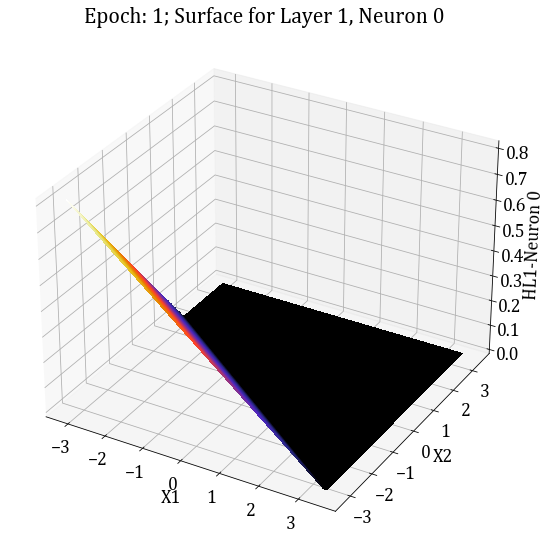

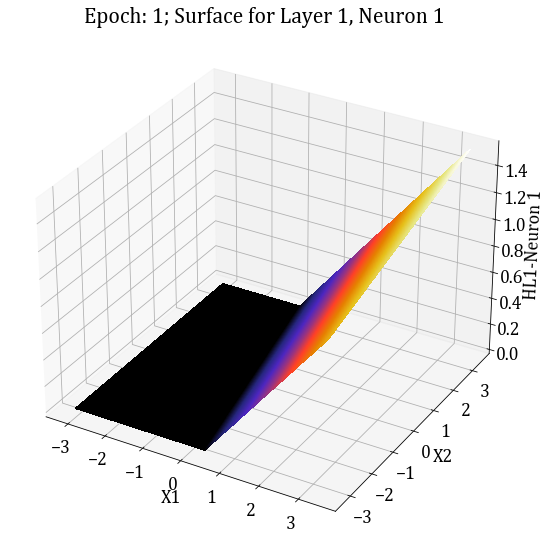

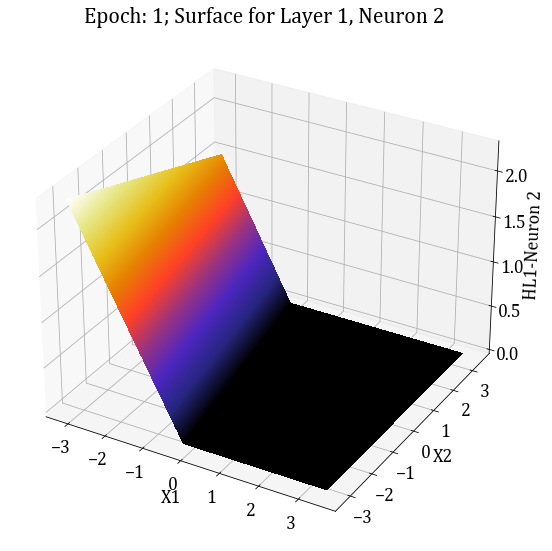

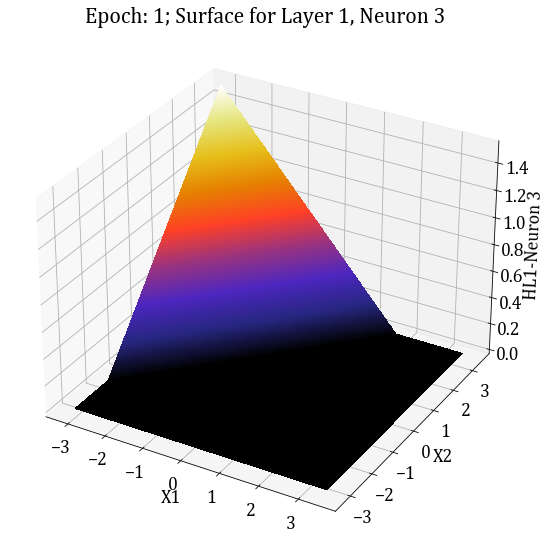

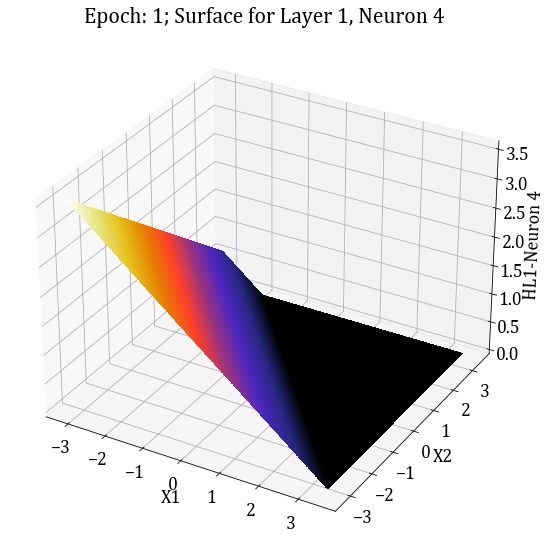

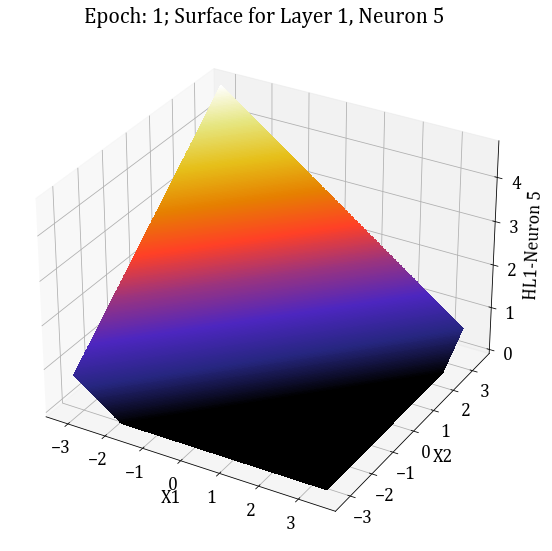

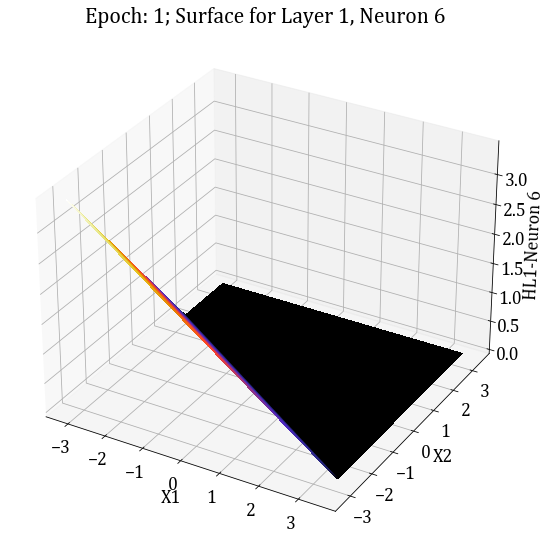

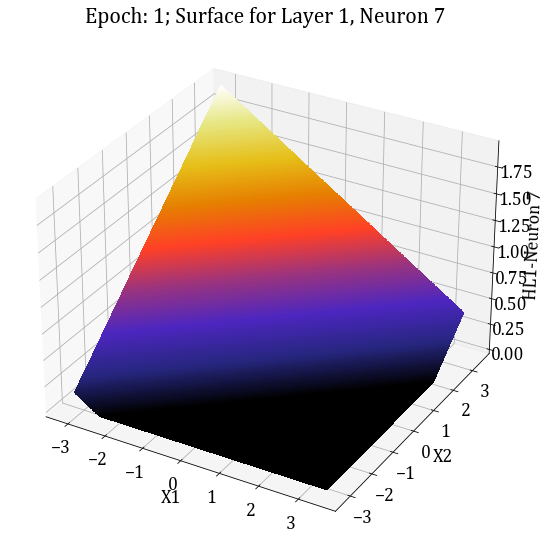

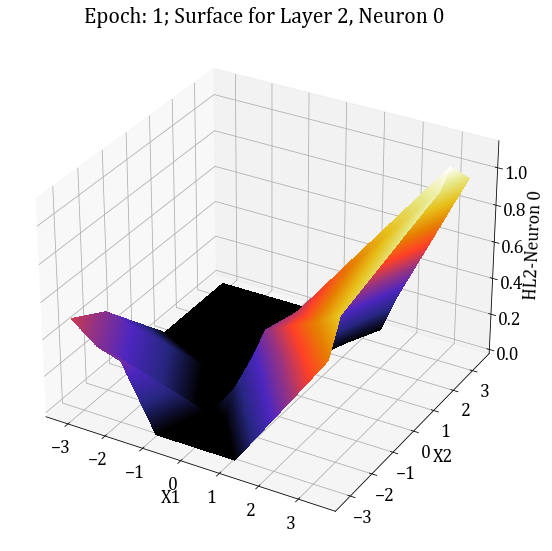

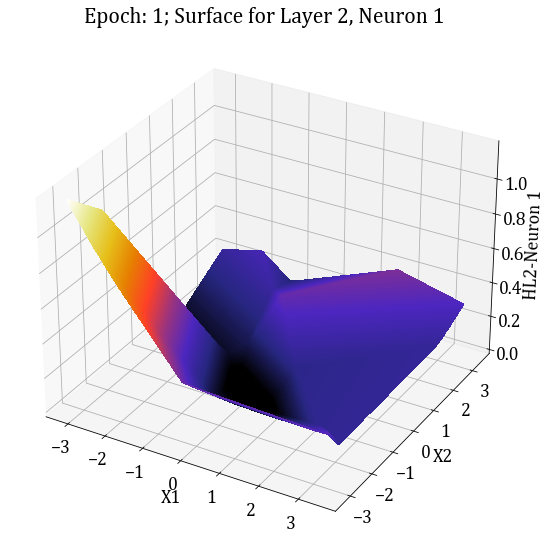

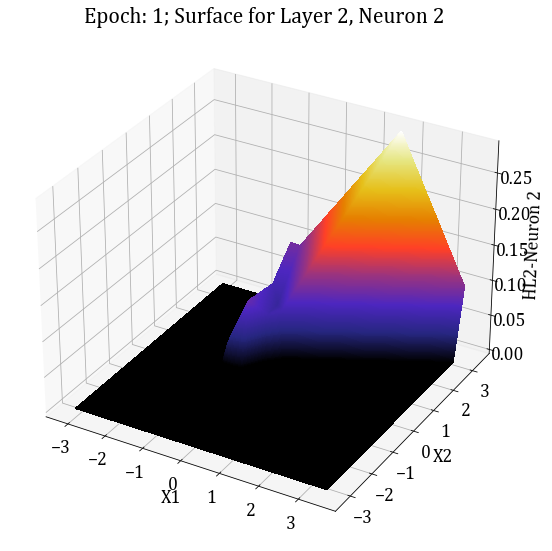

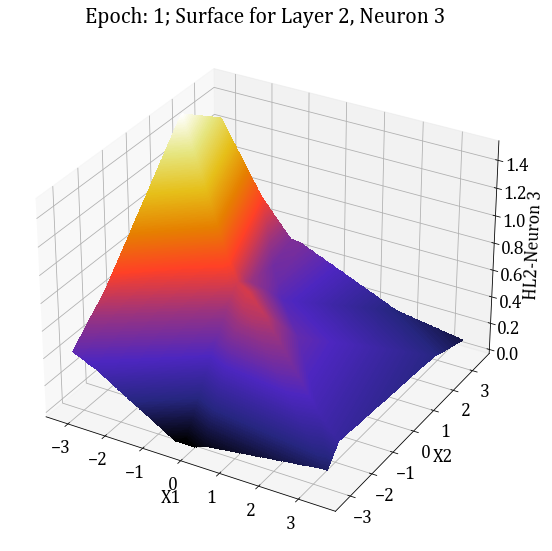

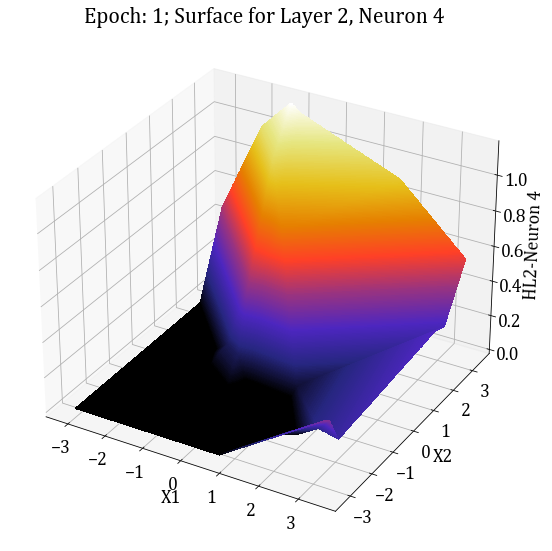

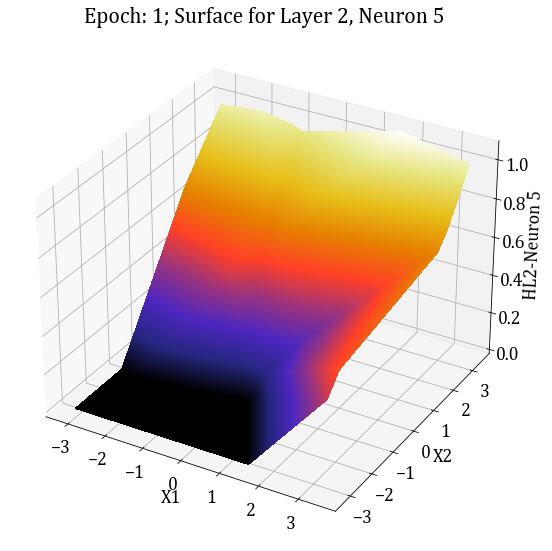

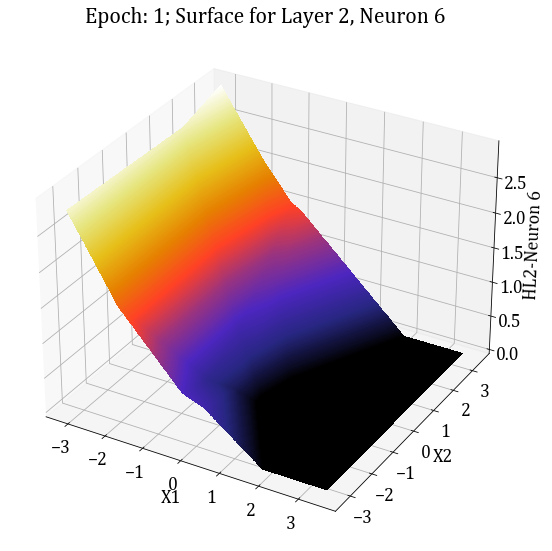

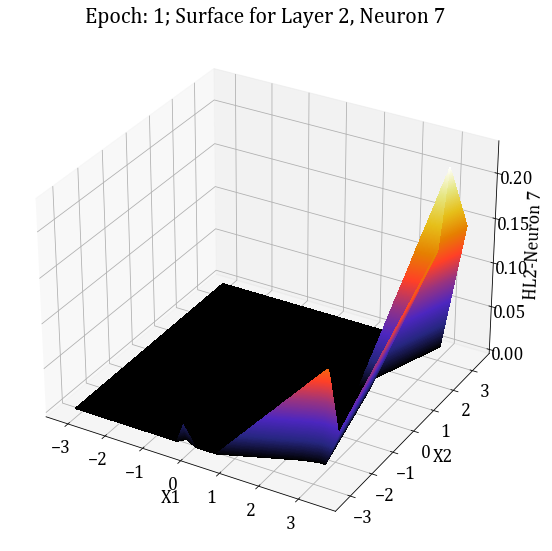

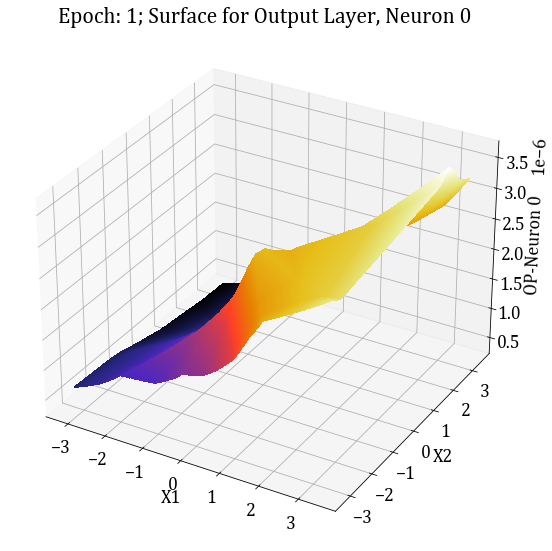

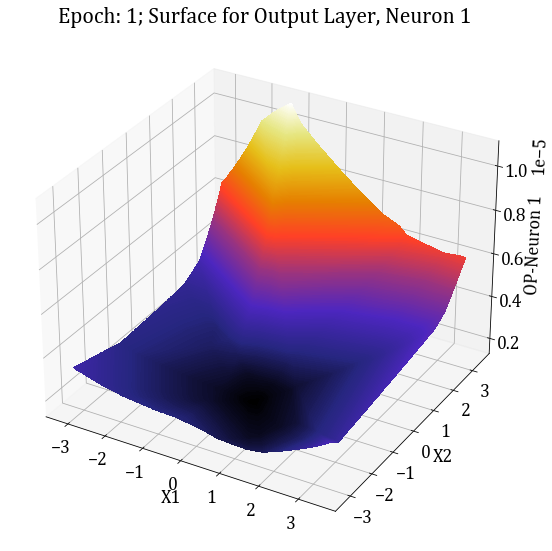

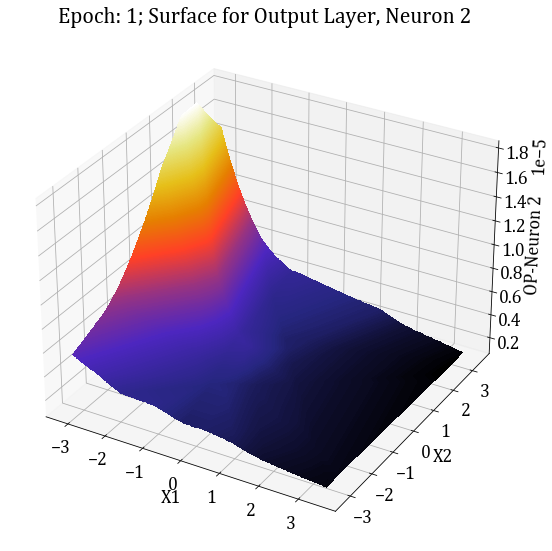

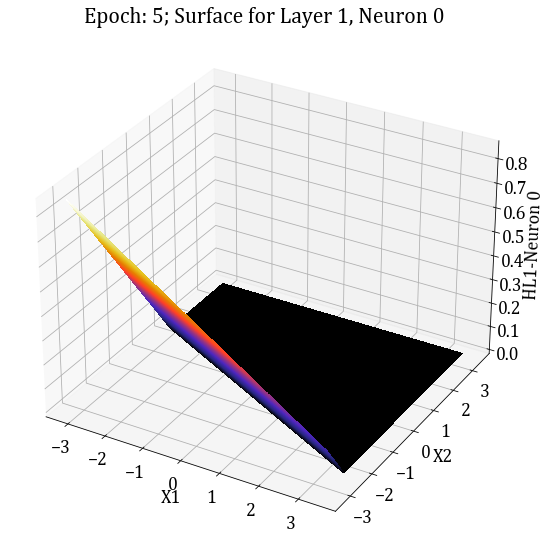

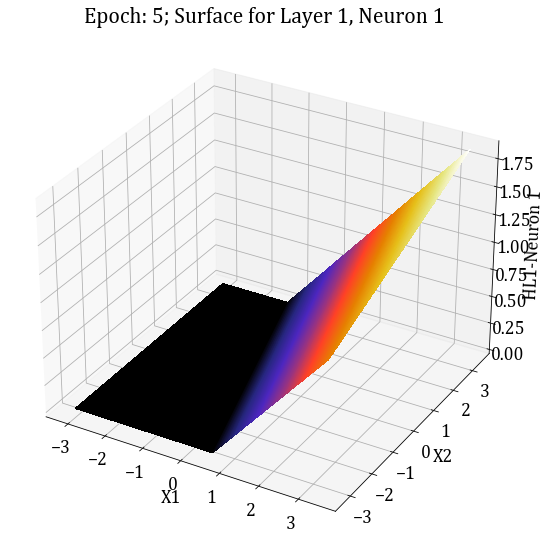

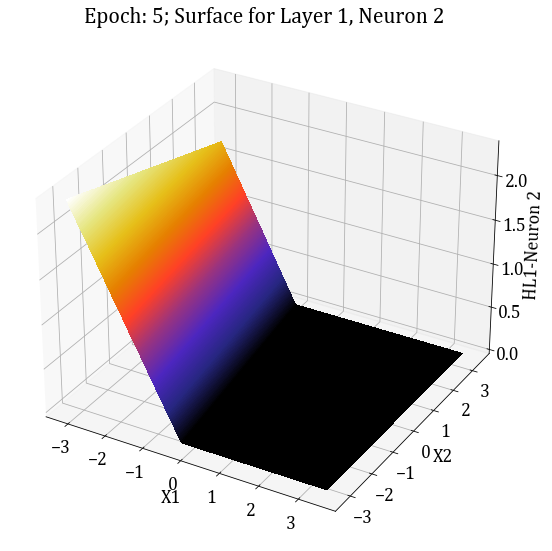

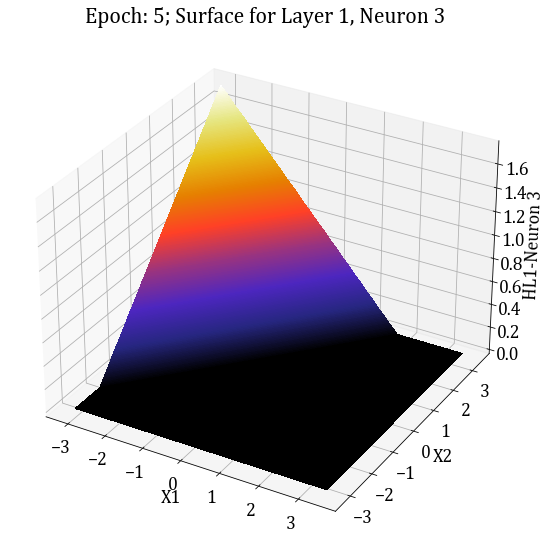

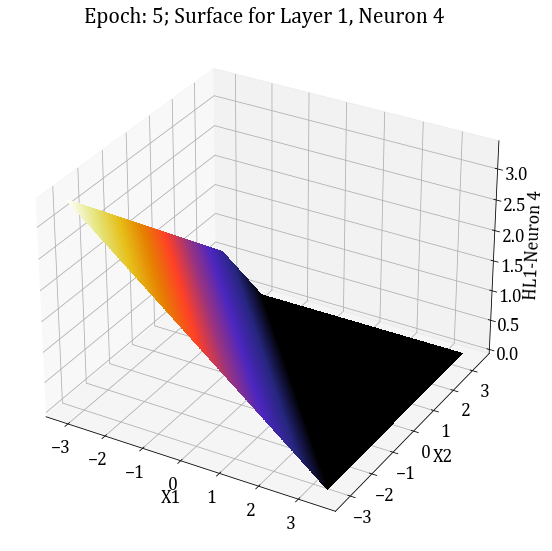

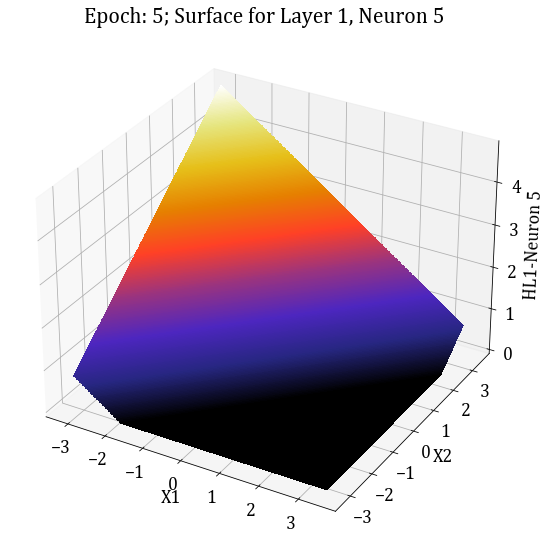

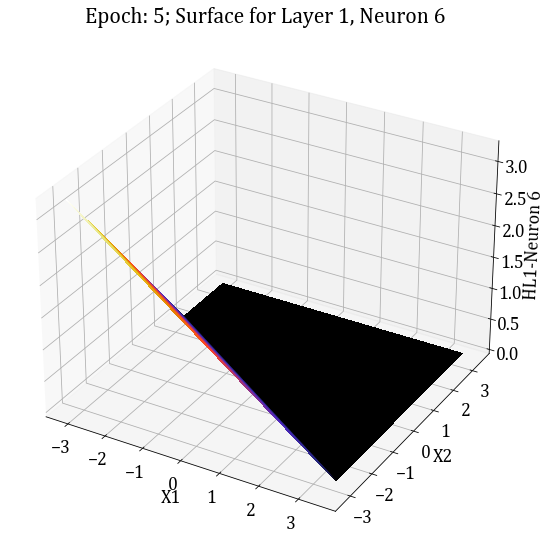

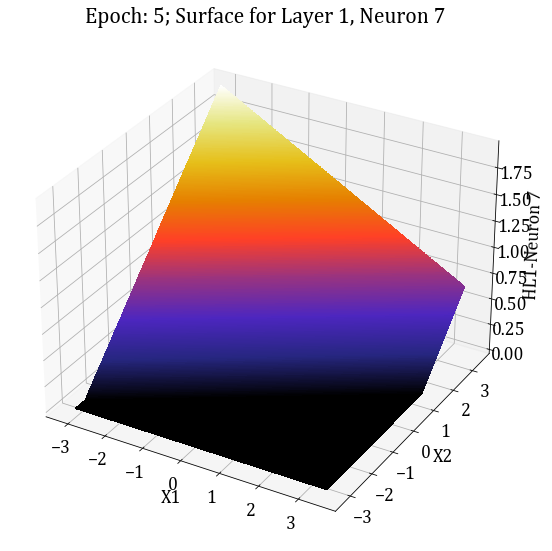

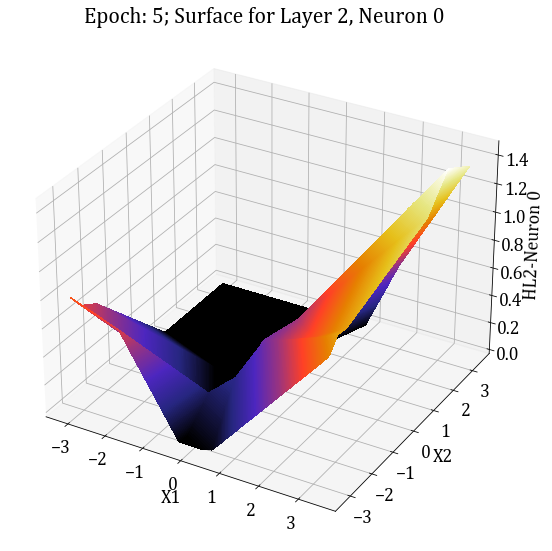

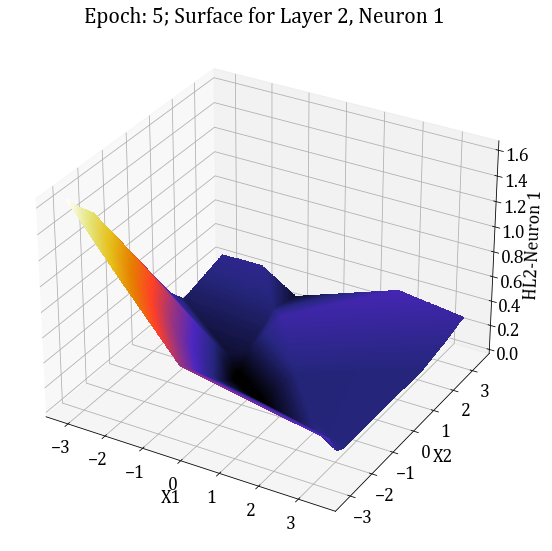

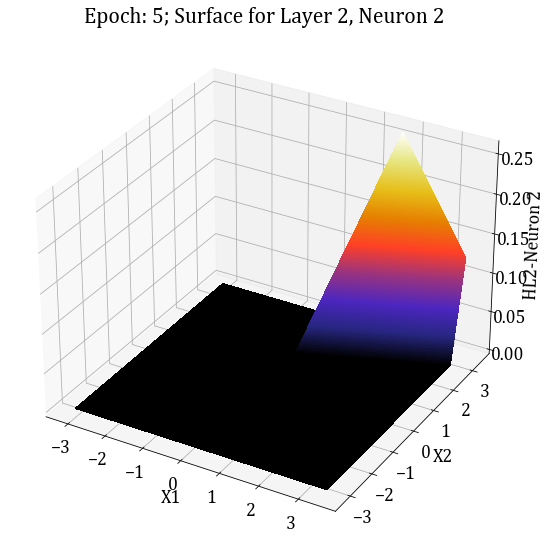

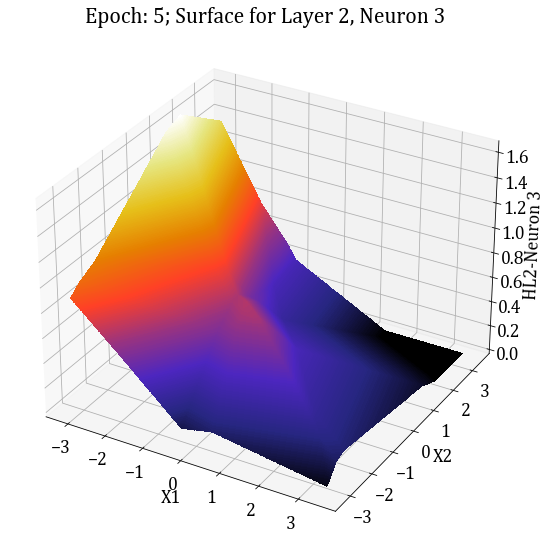

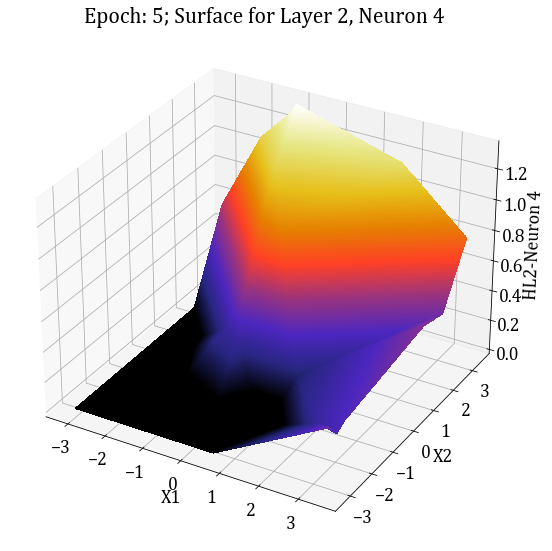

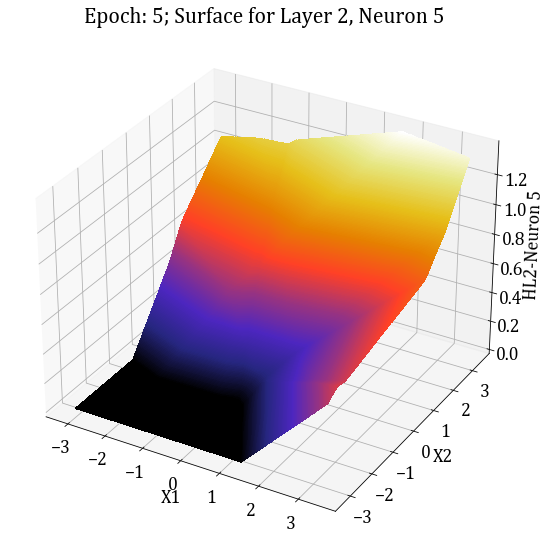

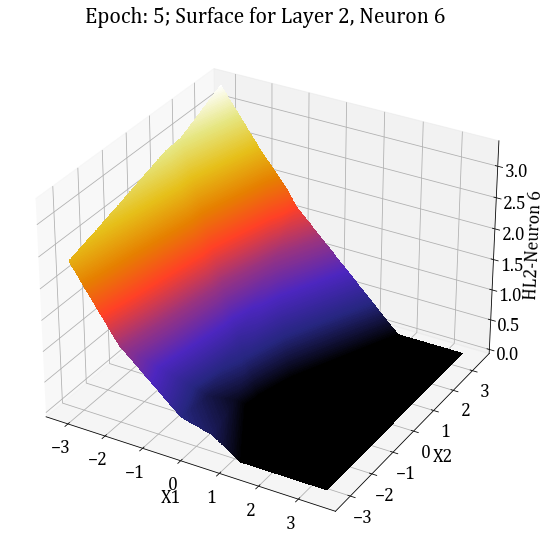

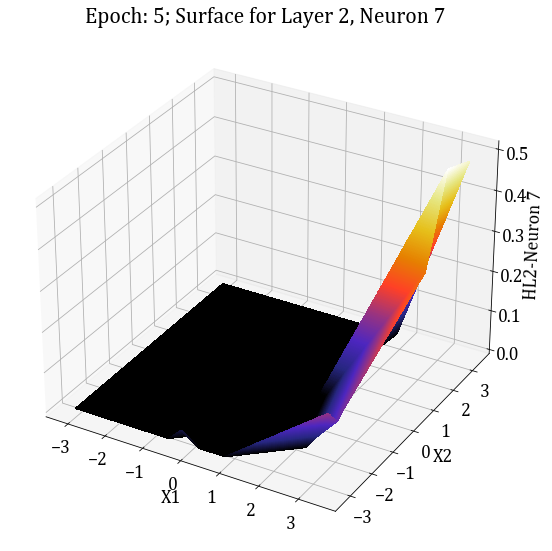

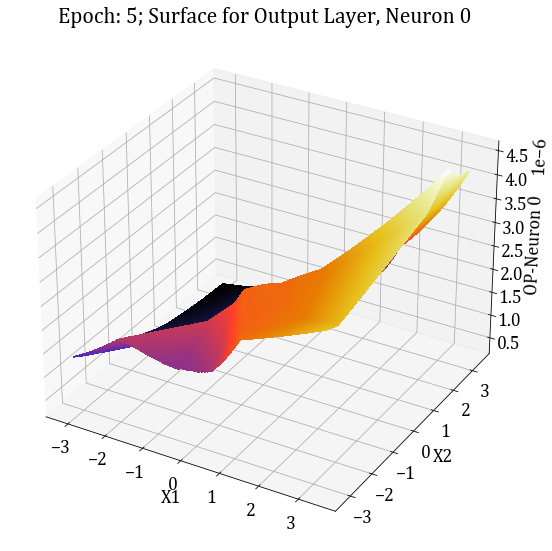

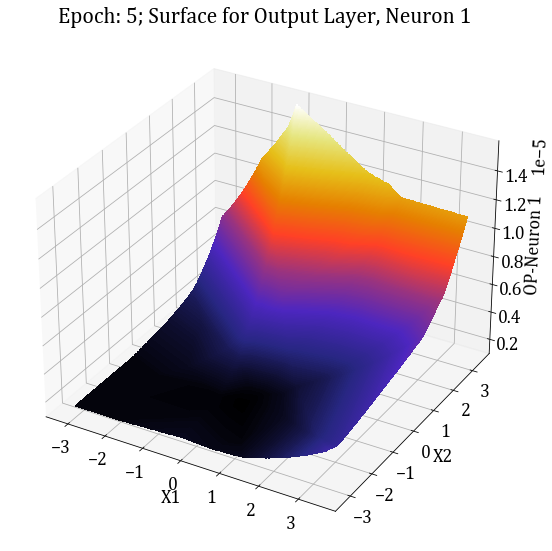

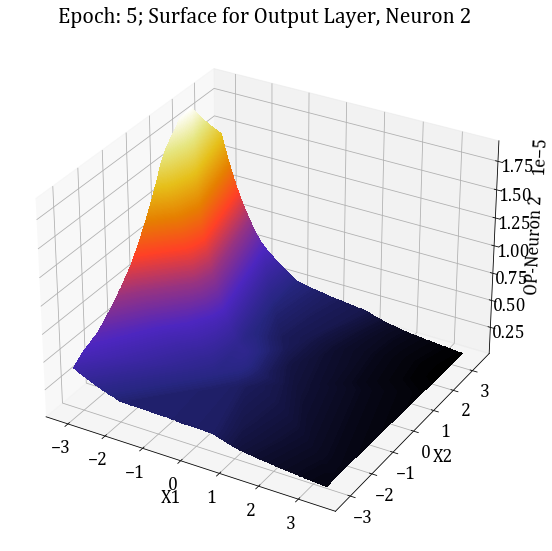

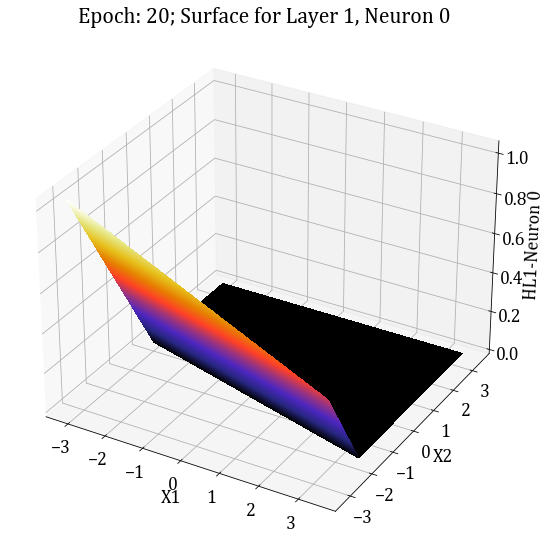

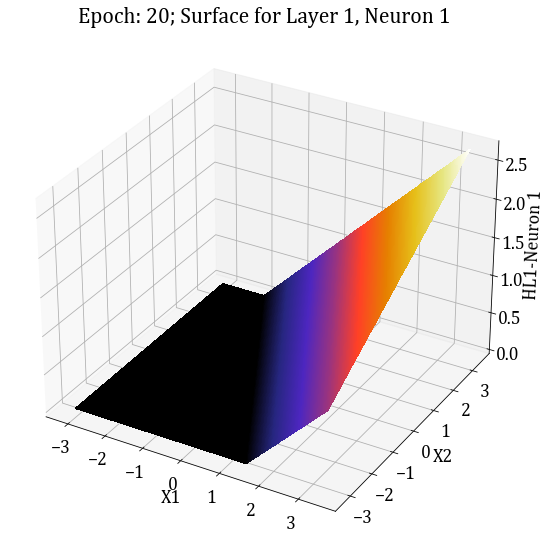

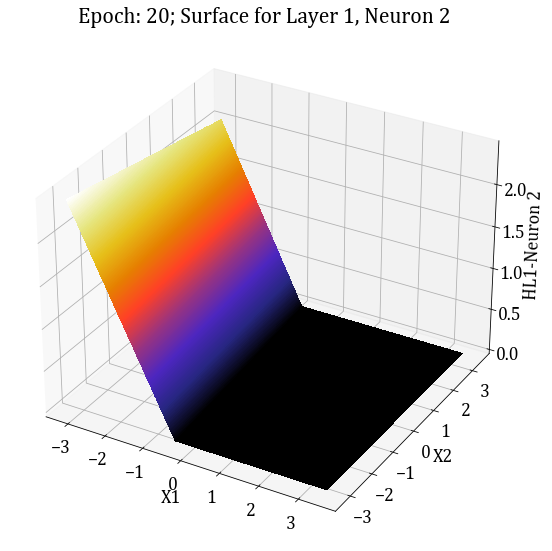

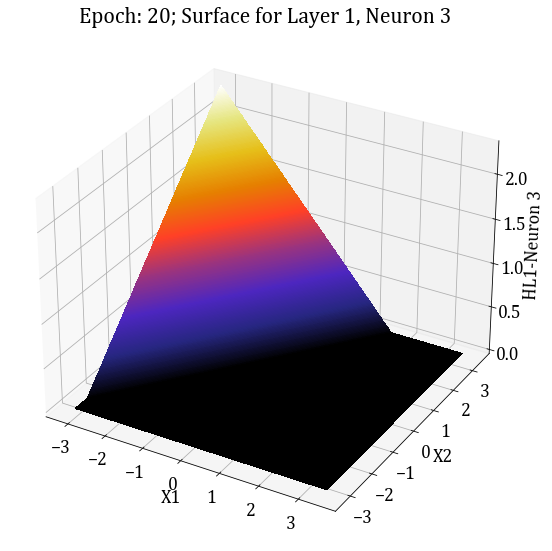

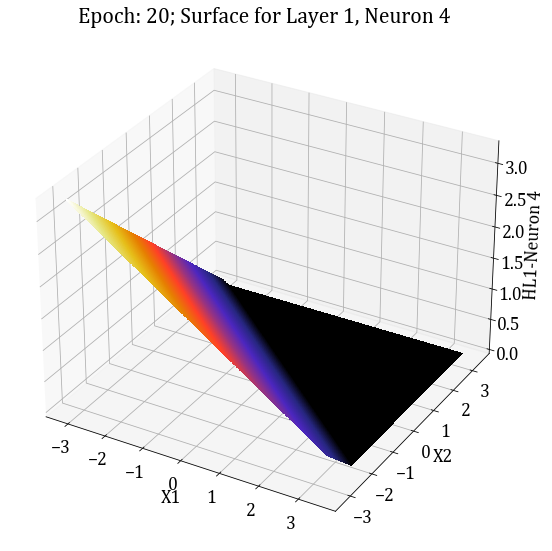

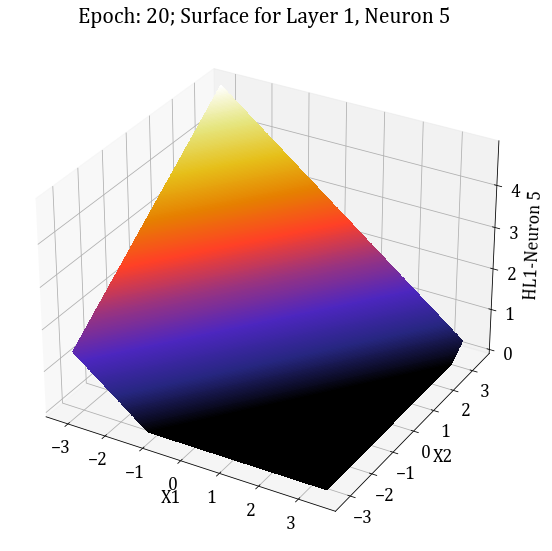

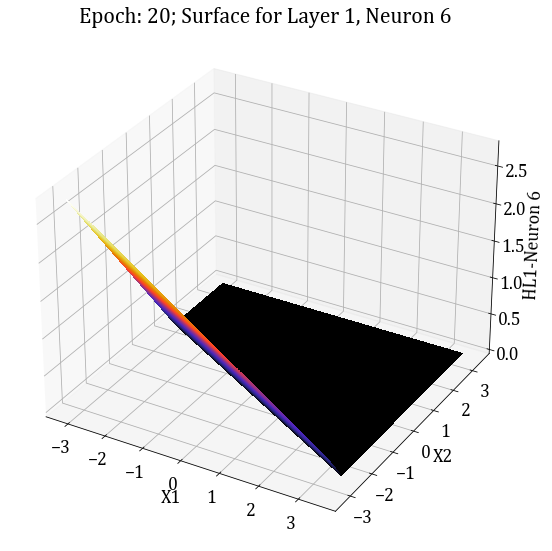

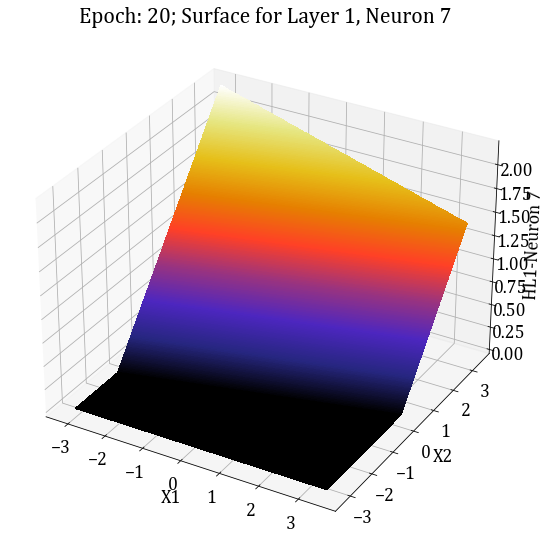

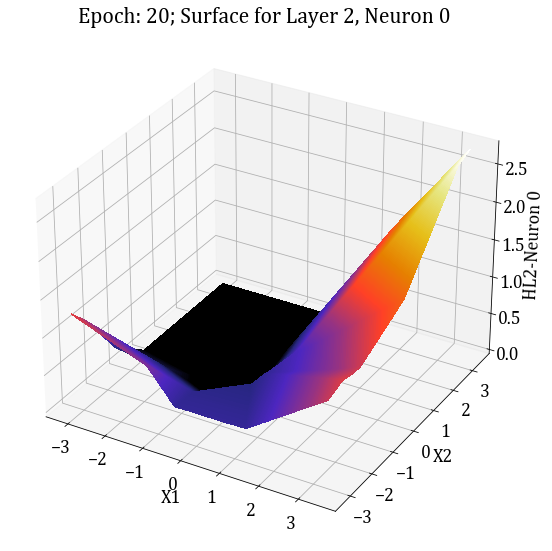

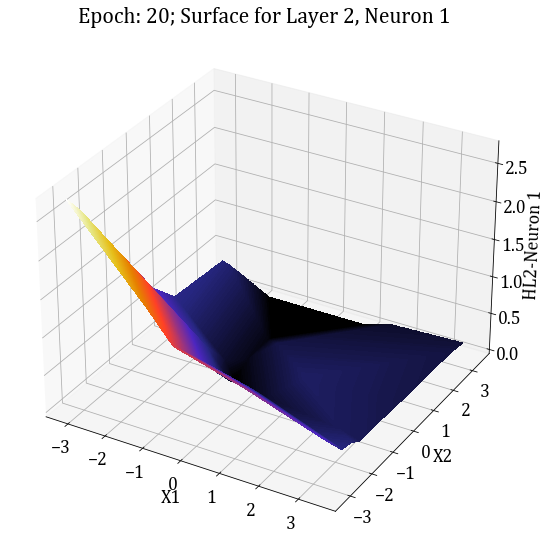

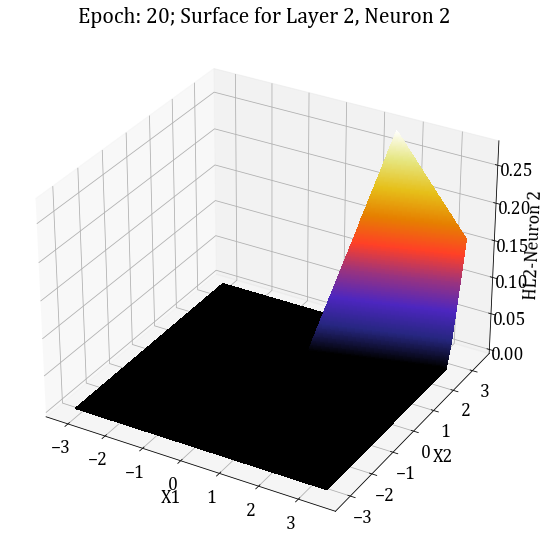

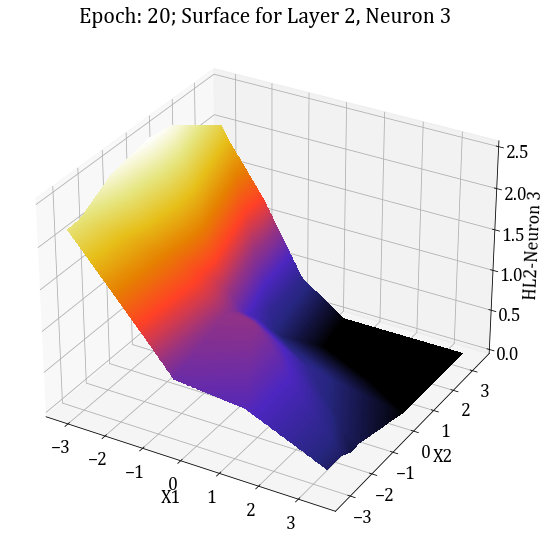

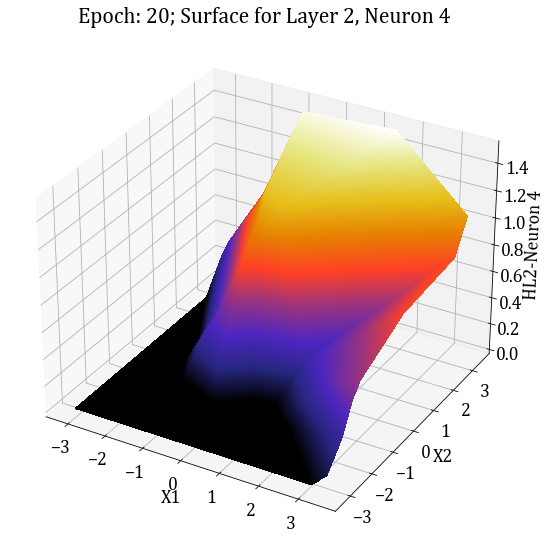

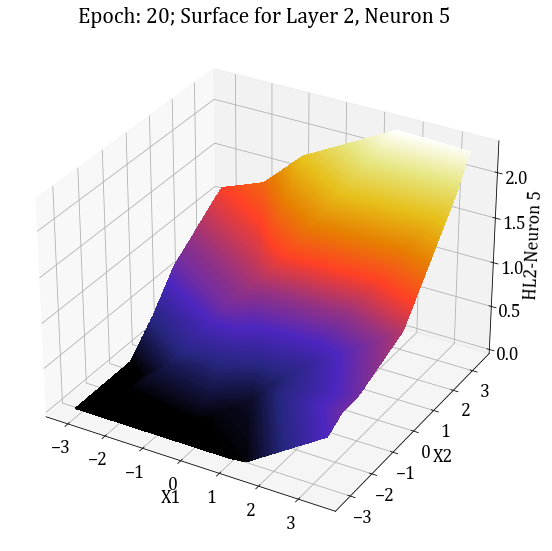

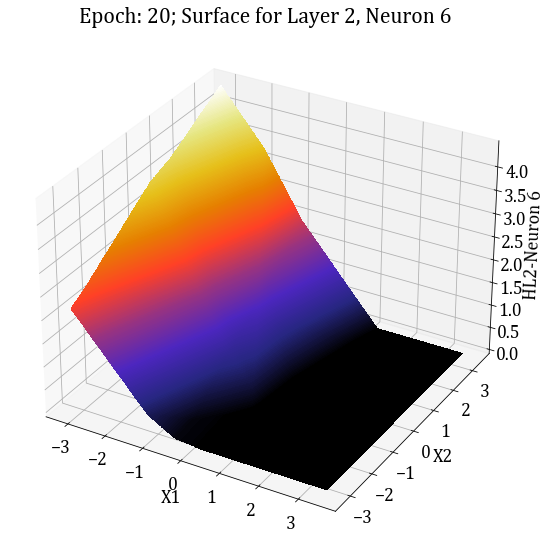

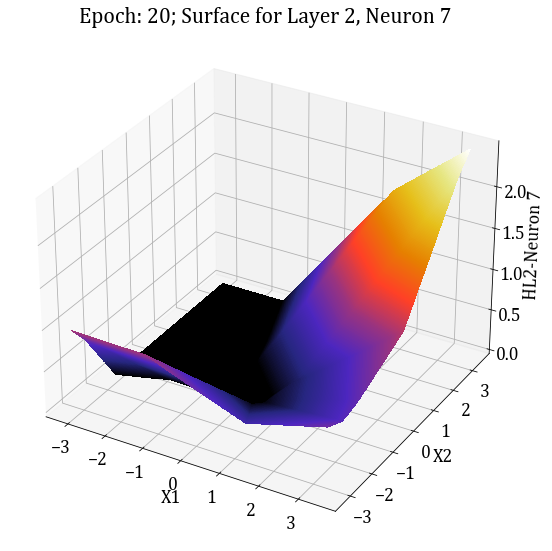

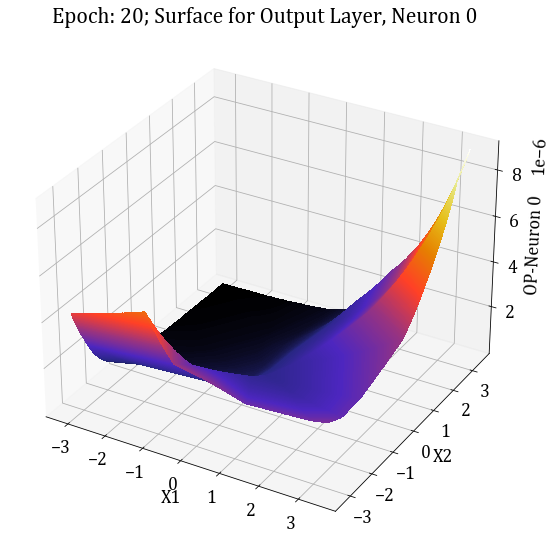

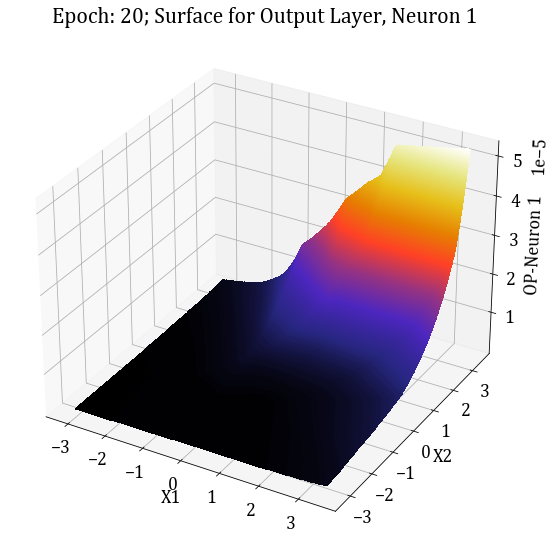

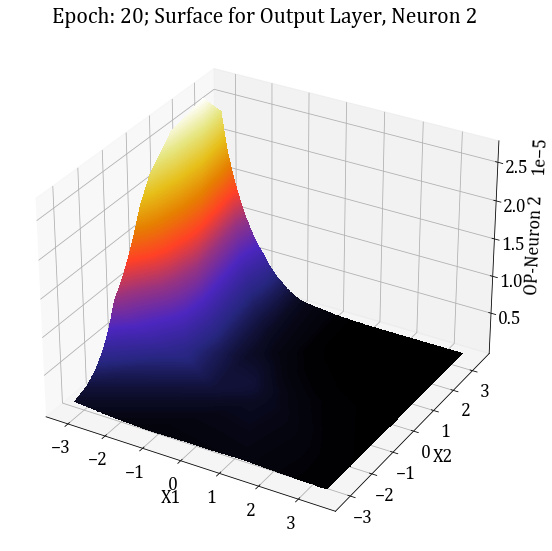

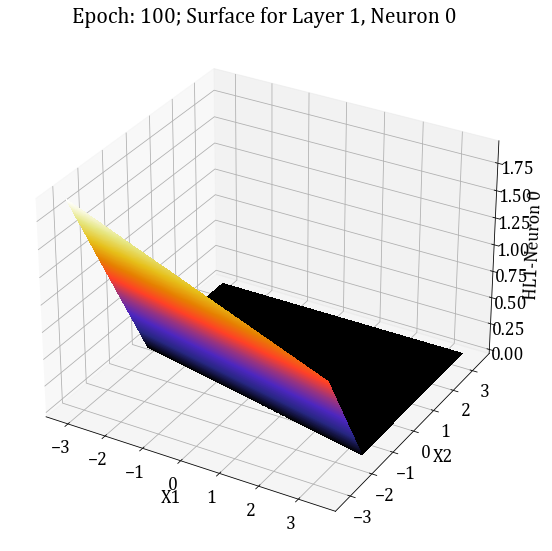

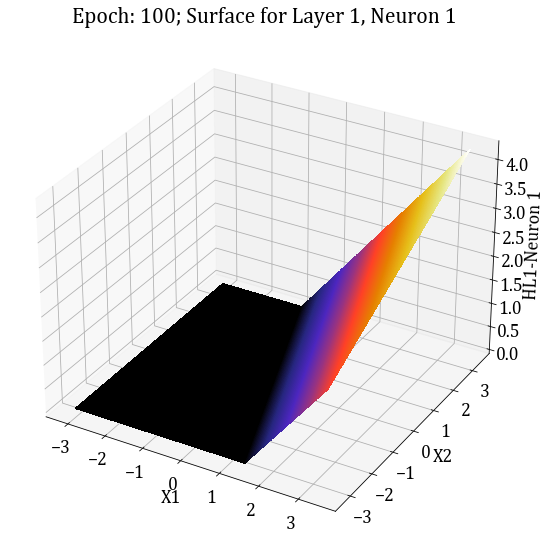

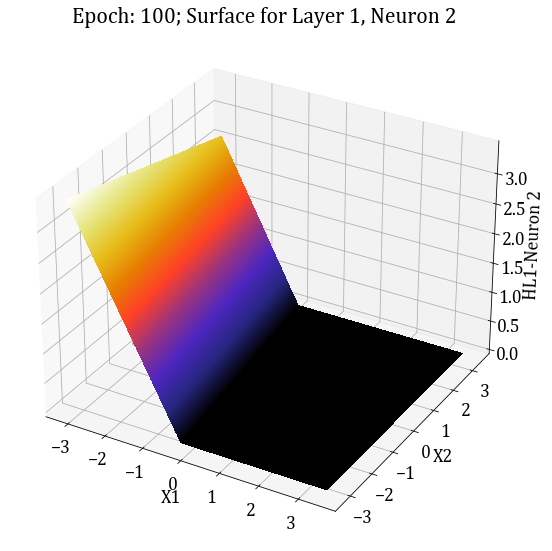

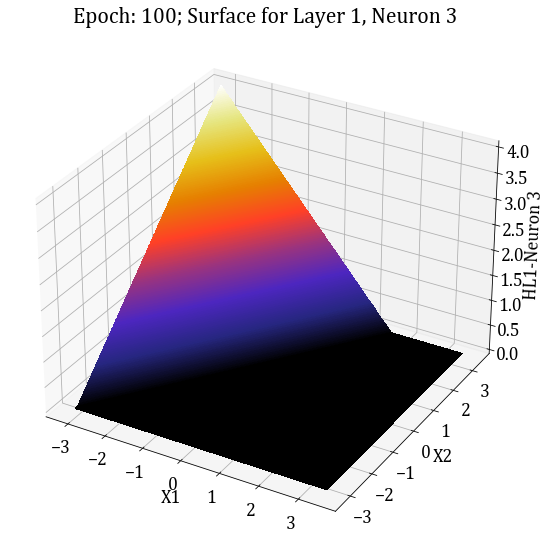

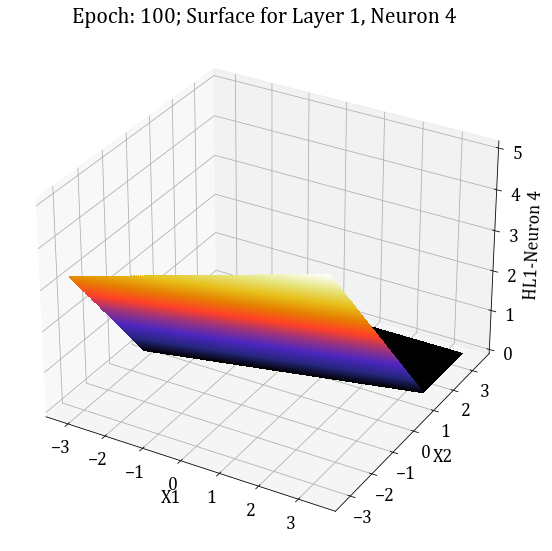

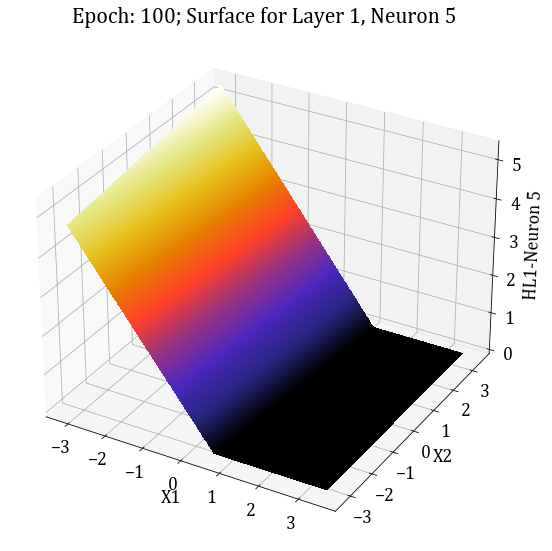

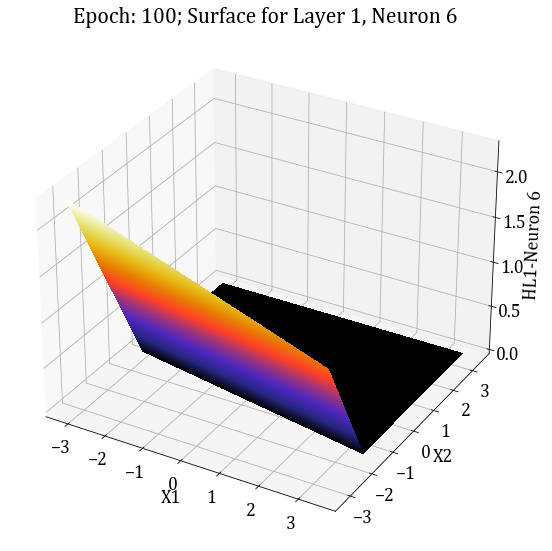

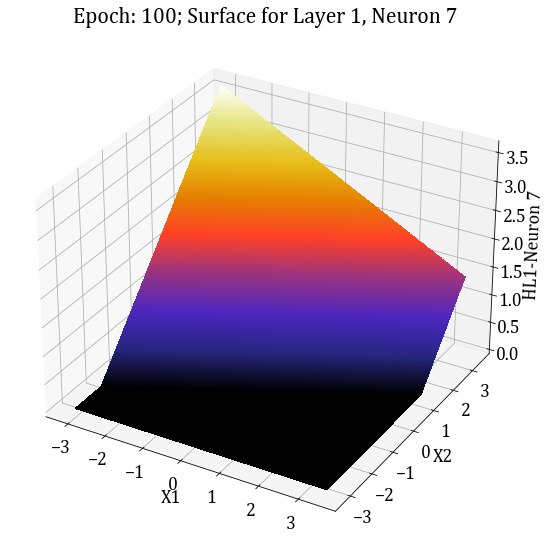

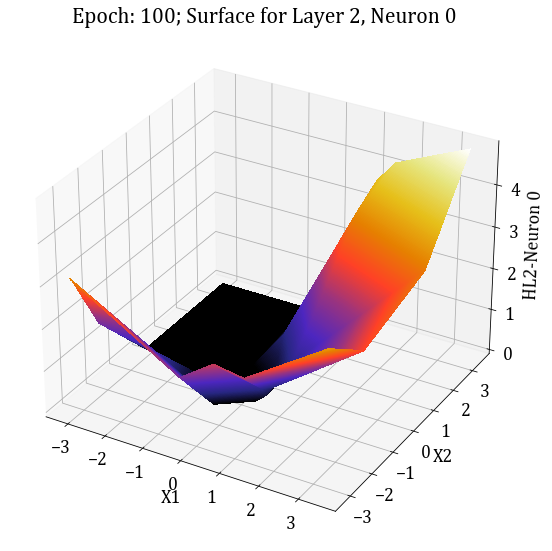

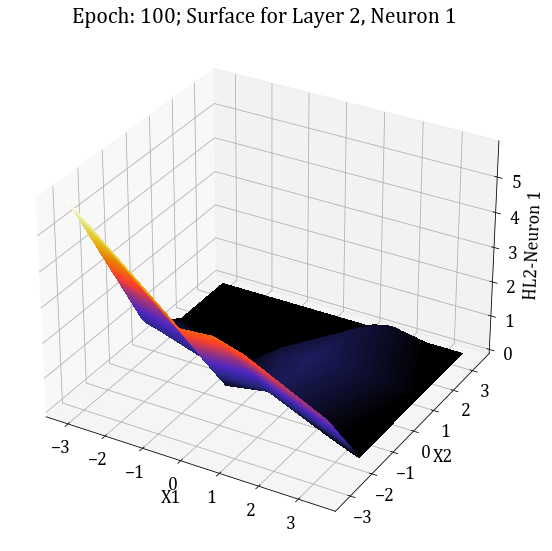

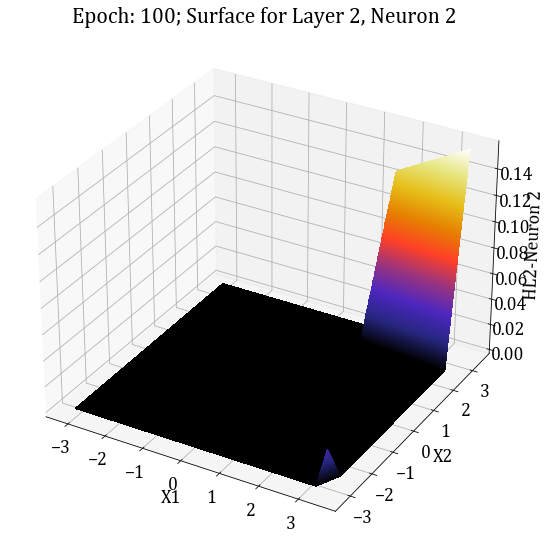

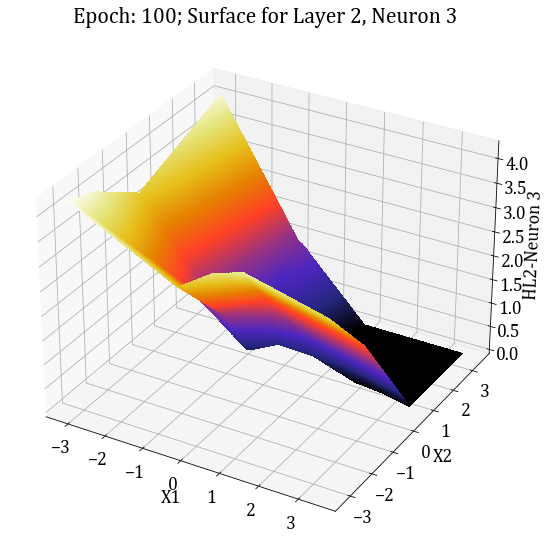

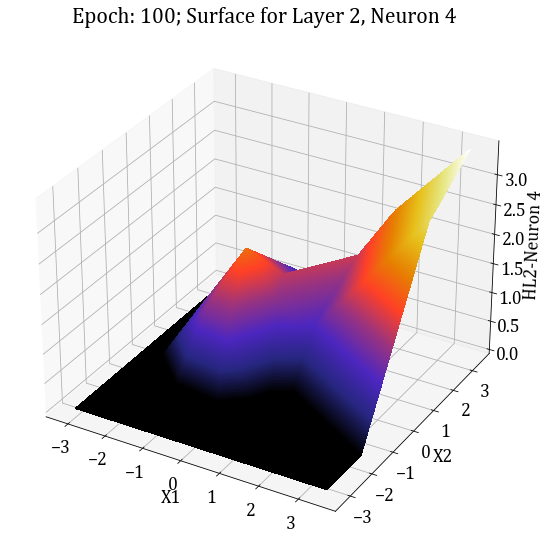

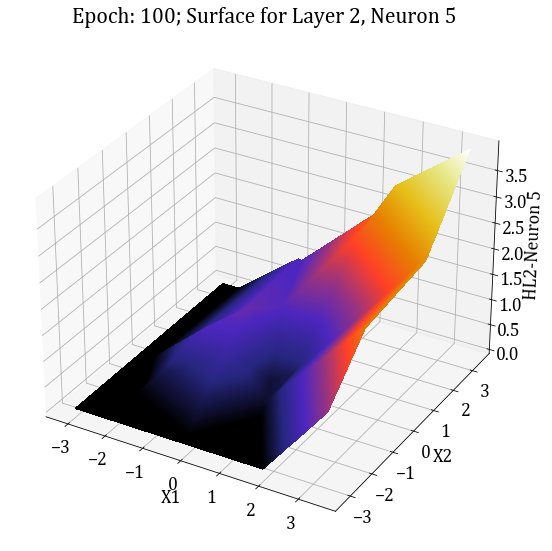

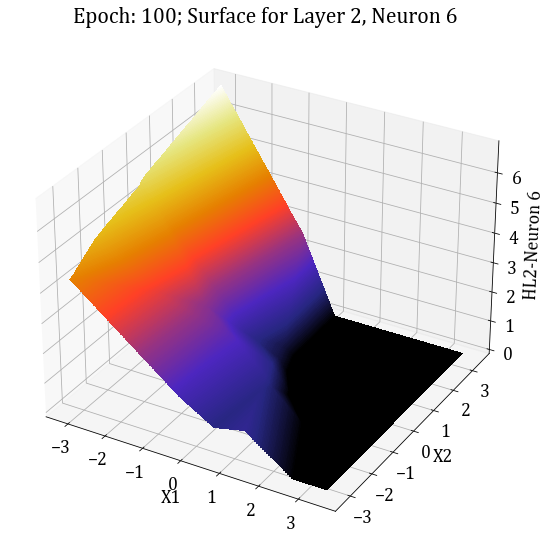

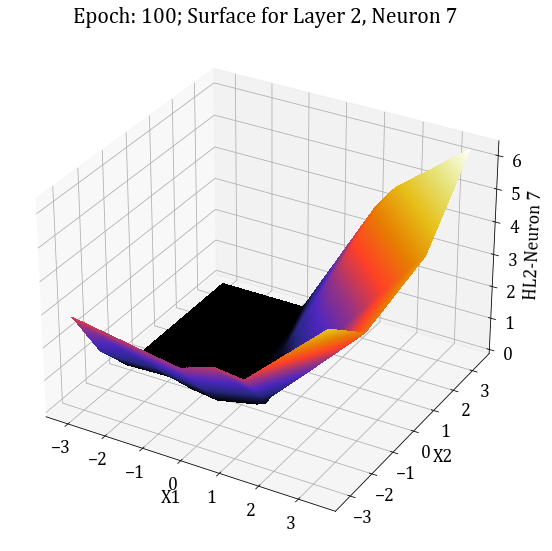

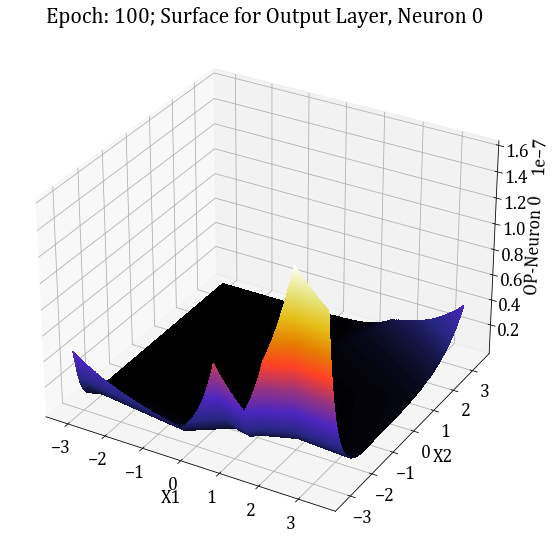

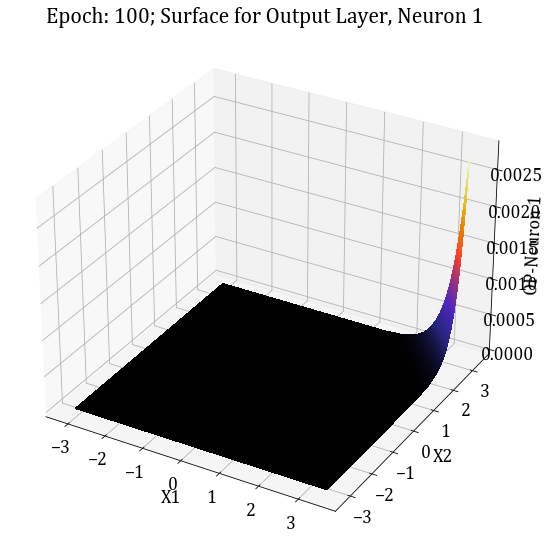

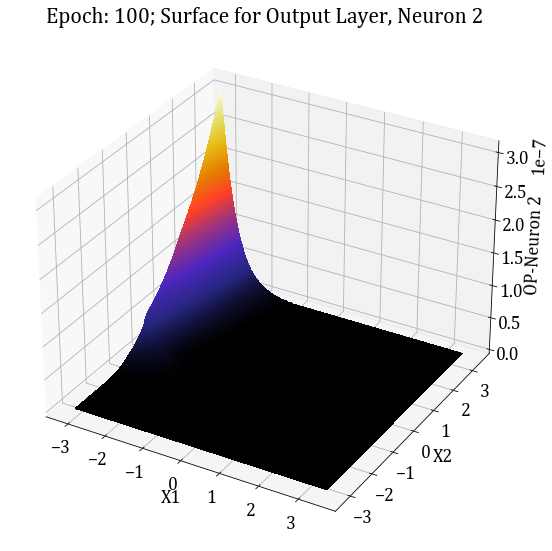

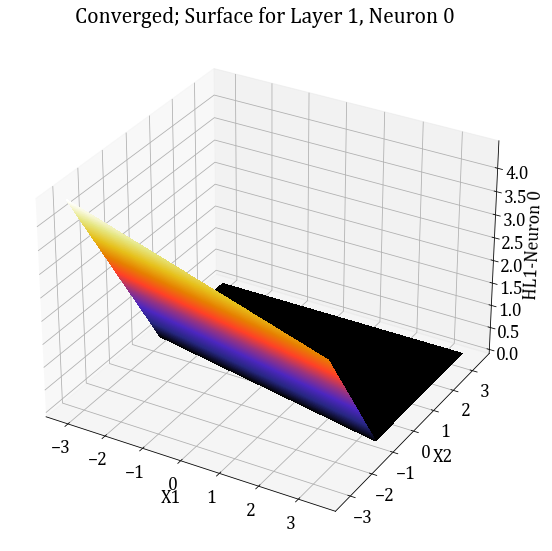

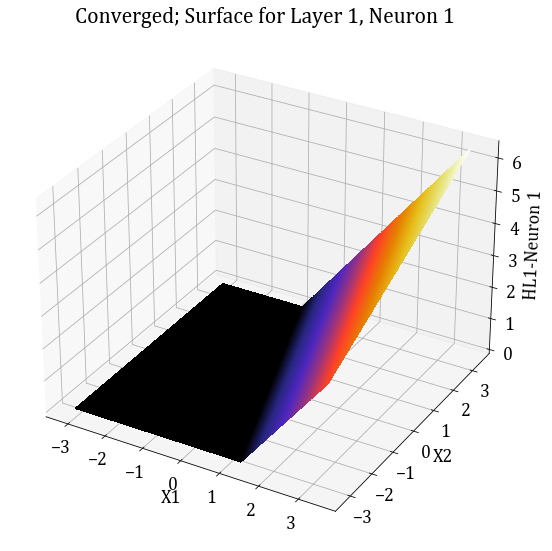

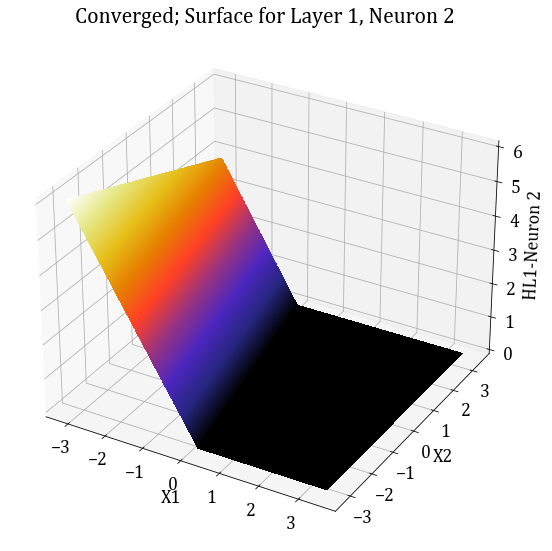

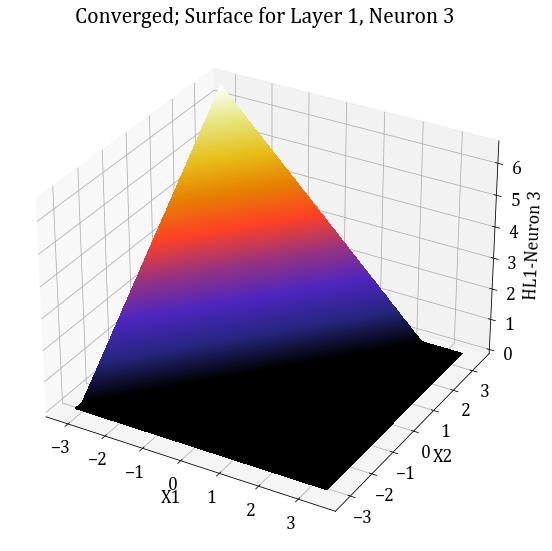

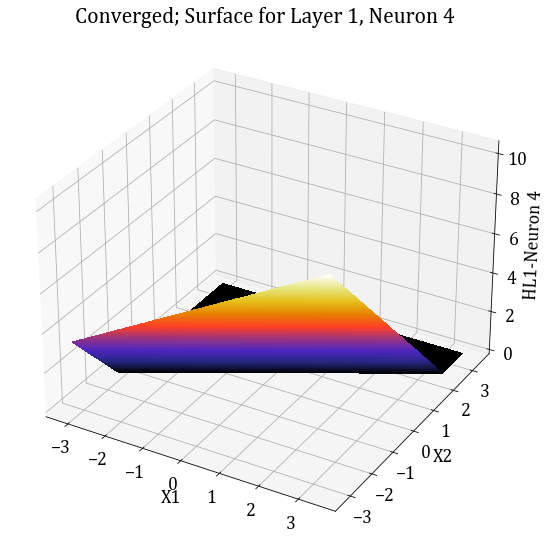

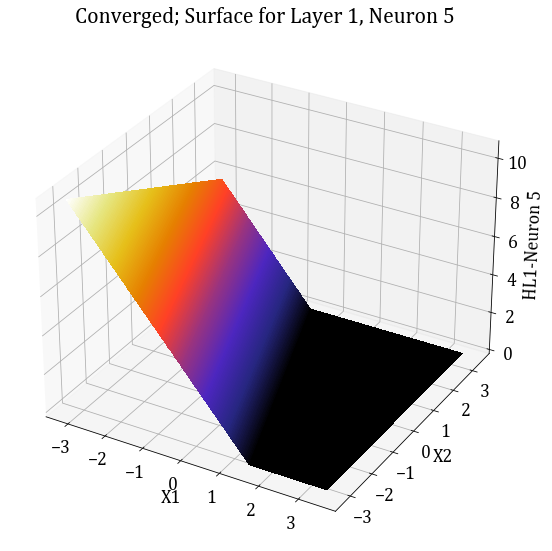

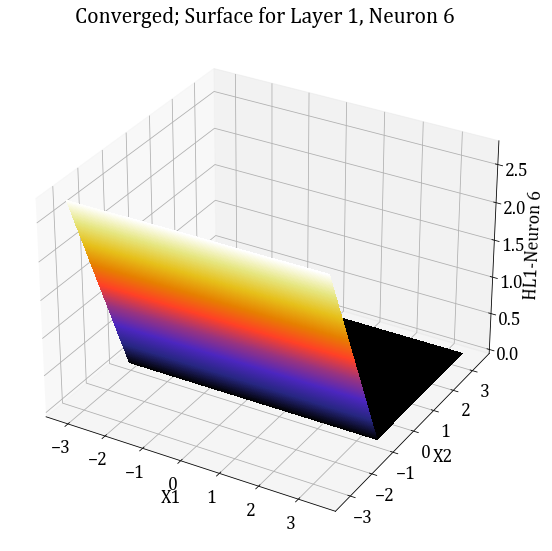

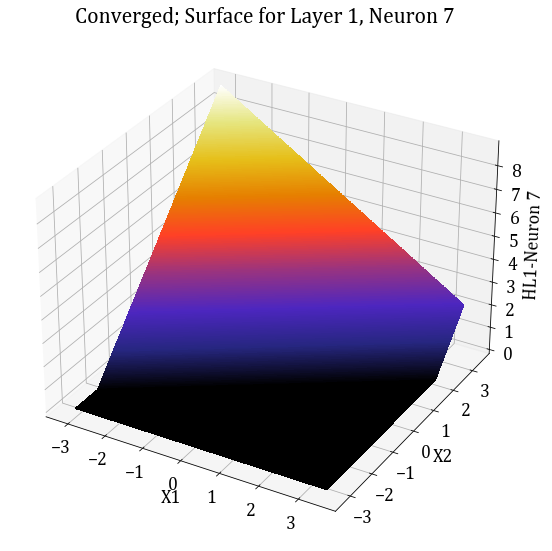

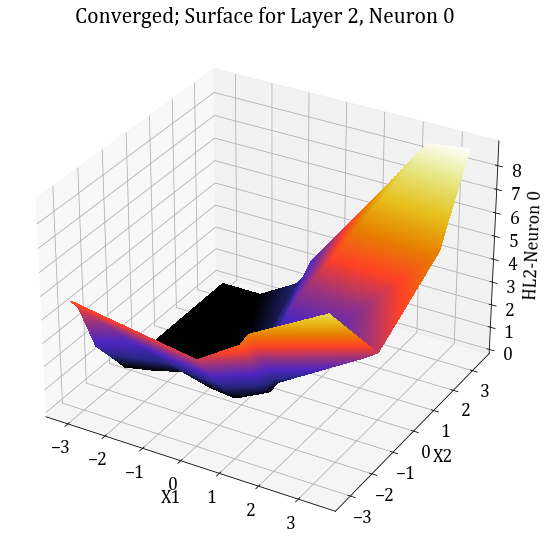

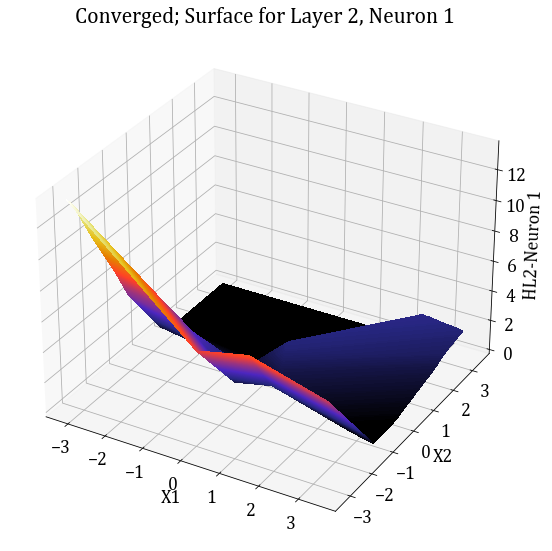

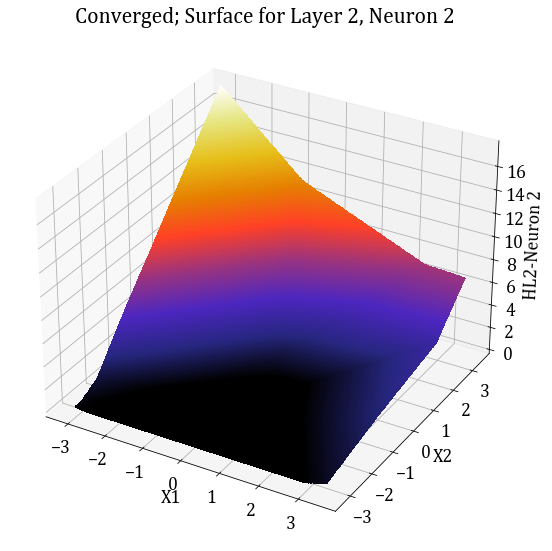

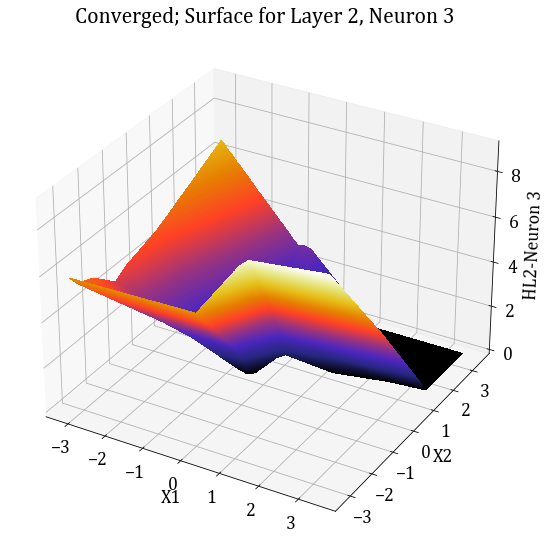

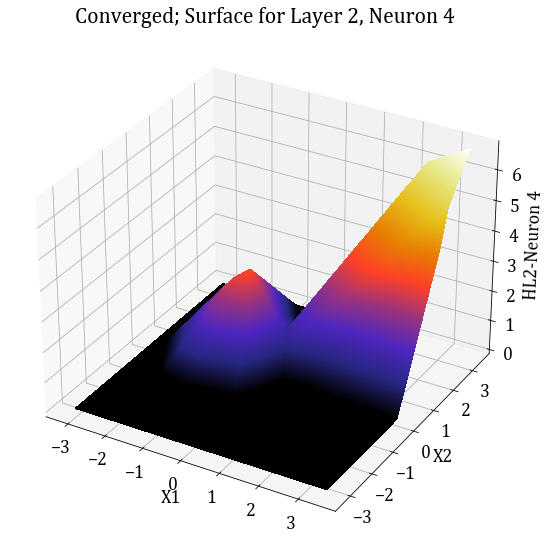

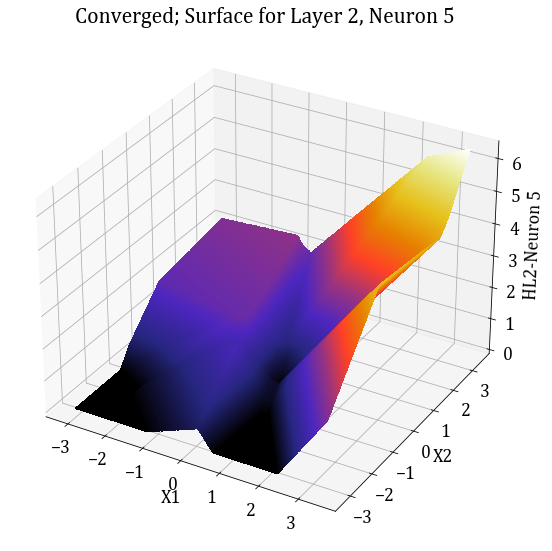

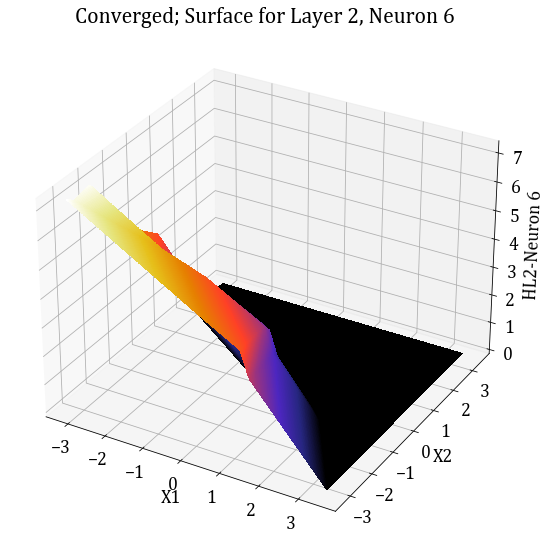

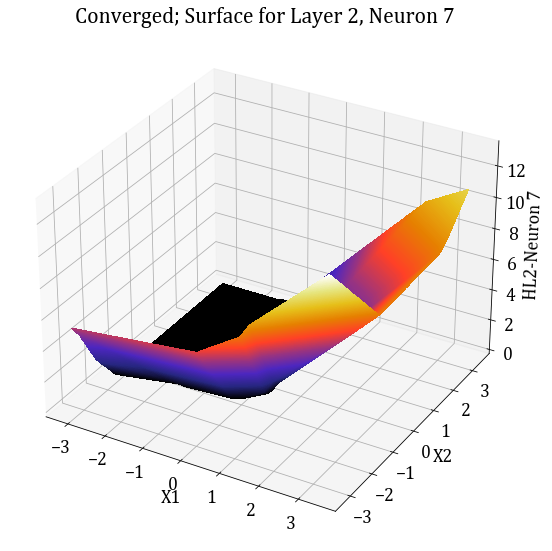

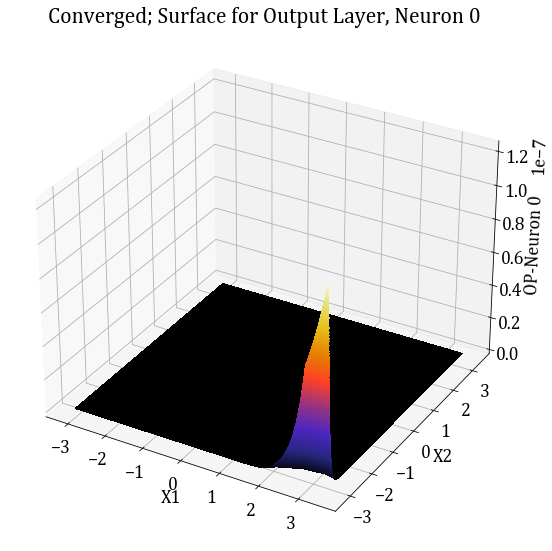

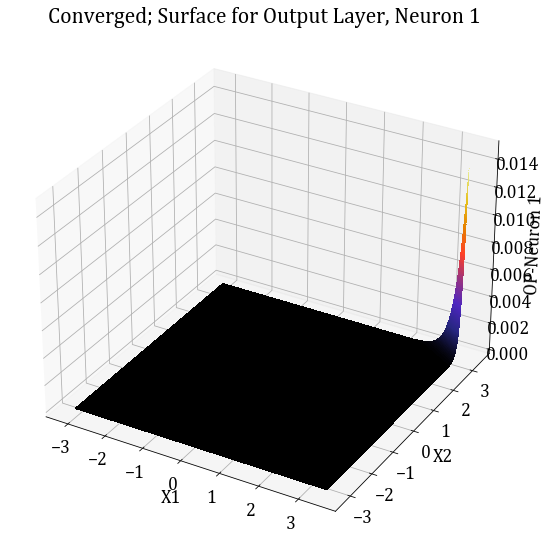

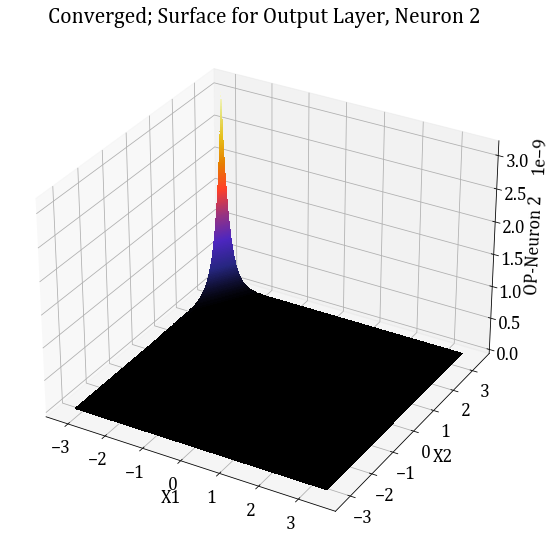

In [9]:
from matplotlib import cm
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
grid = np.c_[xx.ravel(), yy.ravel()]

for epochs in [1, 5, 20, 100]:
    mlp = MLPClassifier(random_state=1, max_iter=epochs, **clf.best_params_)
    mlp.fit(X_train, y_train)
    
    weights = mlp.coefs_
    biases = mlp.intercepts_
    
    a1, a2, op = get_values(weights, biases, grid)
    a1 = a1.reshape(a1.shape[0], *xx.shape)
    a2 = a2.reshape(a2.shape[0], *xx.shape)
    op = op.reshape(op.shape[0], *xx.shape)
    
    
    for i in range(a1.shape[0]):
        fig = plt.figure(figsize=(8,8))
        ax = plt.axes(projection="3d")
        
        # ax.contour3D(xx, yy, a1[i,:], 500)
        ax.contourf(xx, yy, a1[i,:], 500, cmap=cm.CMRmap)
        ax.set_xlabel("X1")
        ax.set_ylabel("X2")
        ax.set_zlabel("HL1-Neuron "+str(i));
        ax.set_title("Epoch: "+ str(epochs) + "; Surface for Layer 1, Neuron "+str(i))
        plt.tight_layout()
        plt.savefig("images/1B_MLFFNN_E"+str(epochs)+"_HL1_N"+str(i)+".png")
        plt.show()
        
    for i in range(a2.shape[0]):
        fig = plt.figure(figsize=(8,8))
        ax = plt.axes(projection="3d")
        
        # ax.contour3D(xx, yy, a2[i,:], 500)
        ax.contourf(xx, yy, a2[i,:], 500, cmap=cm.CMRmap)
        ax.set_xlabel("X1")
        ax.set_ylabel("X2")
        ax.set_zlabel("HL2-Neuron "+str(i));
        ax.set_title("Epoch: "+ str(epochs) + "; Surface for Layer 2, Neuron "+str(i))
        plt.tight_layout()
        plt.savefig("images/1B_MLFFNN_E"+str(epochs)+"_HL2_N"+str(i)+".png")
        plt.show()
        
    for i in range(op.shape[0]):
        fig = plt.figure(figsize=(8,8))
        ax = plt.axes(projection="3d")
        
        # ax.contour3D(xx, yy, op[i,:], 500)
        ax.contourf(xx, yy, op[i,:], 500, cmap=cm.CMRmap)
        ax.set_xlabel("X1")
        ax.set_ylabel("X2")
        ax.set_zlabel("OP-Neuron "+str(i));
        ax.set_title("Epoch: "+ str(epochs) + "; Surface for Output Layer, Neuron "+str(i))
        plt.tight_layout()
        plt.savefig("images/1B_MLFFNN_E"+str(epochs)+"_OP_N"+str(i)+".png")
        plt.show()
        

mlp = MLPClassifier(random_state=1, max_iter=1000, **clf.best_params_)
mlp.fit(X_train, y_train)

weights = mlp.coefs_
biases = mlp.intercepts_

a1, a2, op = get_values(weights, biases, grid)
a1 = a1.reshape(a1.shape[0], *xx.shape)
a2 = a2.reshape(a2.shape[0], *xx.shape)
op = op.reshape(op.shape[0], *xx.shape)


for i in range(a1.shape[0]):
    fig = plt.figure(figsize=(8,8))
    ax = plt.axes(projection="3d")

    # ax.contour3D(xx, yy, a1[i,:], 500)
    ax.contourf(xx, yy, a1[i,:], 500, cmap=cm.CMRmap)
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("HL1-Neuron "+str(i));
    ax.set_title("Converged; Surface for Layer 1, Neuron "+str(i))
    plt.tight_layout()
    plt.savefig("images/1B_MLFFNN_conv_OP_N"+str(i)+".png")
    plt.show()

for i in range(a2.shape[0]):
    fig = plt.figure(figsize=(8,8))
    ax = plt.axes(projection="3d")

    # ax.contour3D(xx, yy, a2[i,:], 500)
    ax.contourf(xx, yy, a2[i,:], 500, cmap=cm.CMRmap)
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("HL2-Neuron "+str(i));
    ax.set_title("Converged; Surface for Layer 2, Neuron "+str(i))
    plt.tight_layout()
    plt.savefig("images/1B_MLFFNN_conv_OP_N"+str(i)+".png")
    plt.show()

for i in range(op.shape[0]):
    fig = plt.figure(figsize=(8,8))
    ax = plt.axes(projection="3d")

    # ax.contour3D(xx, yy, op[i,:], 500)
    ax.contourf(xx, yy, op[i,:], 500, cmap=cm.CMRmap)
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("OP-Neuron "+str(i));
    ax.set_title("Converged; Surface for Output Layer, Neuron "+str(i))
    plt.tight_layout()
    plt.savefig("images/1B_MLFFNN_conv_OP_N"+str(i)+".png")
    plt.show()